Baseline Model Accuracy: 0.8760187272411999
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     48140
           1       0.94      0.70      0.80     26831

    accuracy                           0.88     74971
   macro avg       0.90      0.84      0.86     74971
weighted avg       0.88      0.88      0.87     74971

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Improved Model Accuracy: 0.9933574315401955
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     48140
           1       0.98      1.00      0.99     26831

    accuracy                           0.99     74971
   macro avg       0.99      0.99      0.99     74971
weighted avg       0.99      0.99      0.99     74971



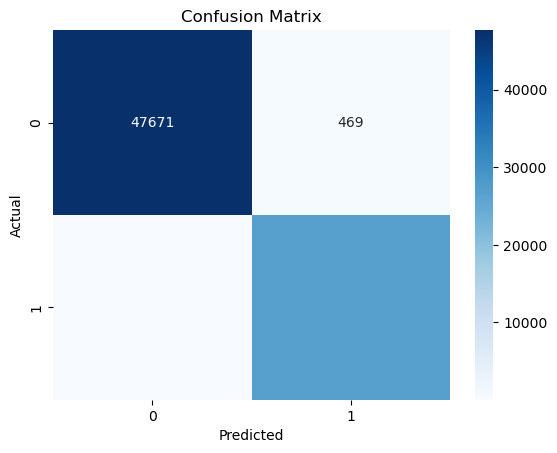

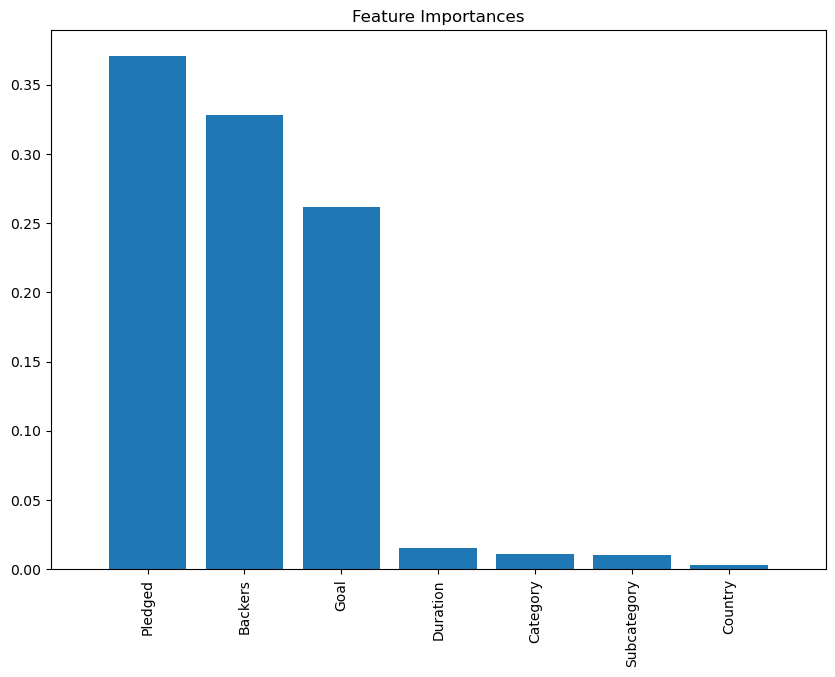

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import black
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the data
data = pd.read_csv('data/kickstarter_projects.csv')


# Data preprocessing
data['Launched'] = pd.to_datetime(data['Launched'])
data['Deadline'] = pd.to_datetime(data['Deadline'])
data['Duration'] = (data['Deadline'] - data['Launched']).dt.days
data['State'] = data['State'].apply(lambda x: 1 if x == 'Successful' else 0)

le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['Subcategory'] = le.fit_transform(data['Subcategory'])
data['Country'] = le.fit_transform(data['Country'])

data = data.drop(columns=['ID', 'Name', 'Launched', 'Deadline'])  # Optionally drop or keep date columns based on analysis needs

# Feature setup
X = data.drop('State', axis=1)
y = data['State']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)
y_pred_baseline = baseline_model.predict(X_test_scaled)
print(f"Baseline Model Accuracy: {accuracy_score(y_test, y_pred_baseline)}")
print(classification_report(y_test, y_pred_baseline))

# Improved model with RandomForest
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search.fit(X_train_scaled, y_train)  # Ensure consistent data use
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_scaled)
print(f"Improved Model Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

# Confusion matrix and visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Feature importance visualization
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [4]:
average_goals = data.groupby('State')['Goal'].mean()

# Calculate success rate by category
# Ensure 'State' is binary where 1 is success
data['Success'] = data['State'].apply(lambda x: 1 if x == 'Successful' else 0)
success_rate = data.groupby('Category')['Success'].mean()

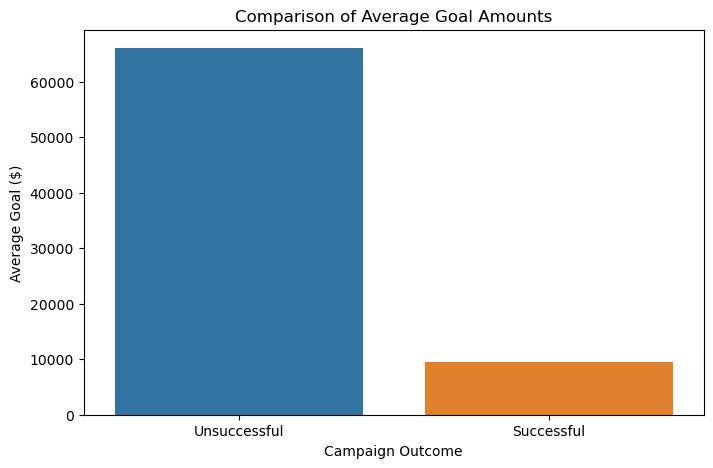

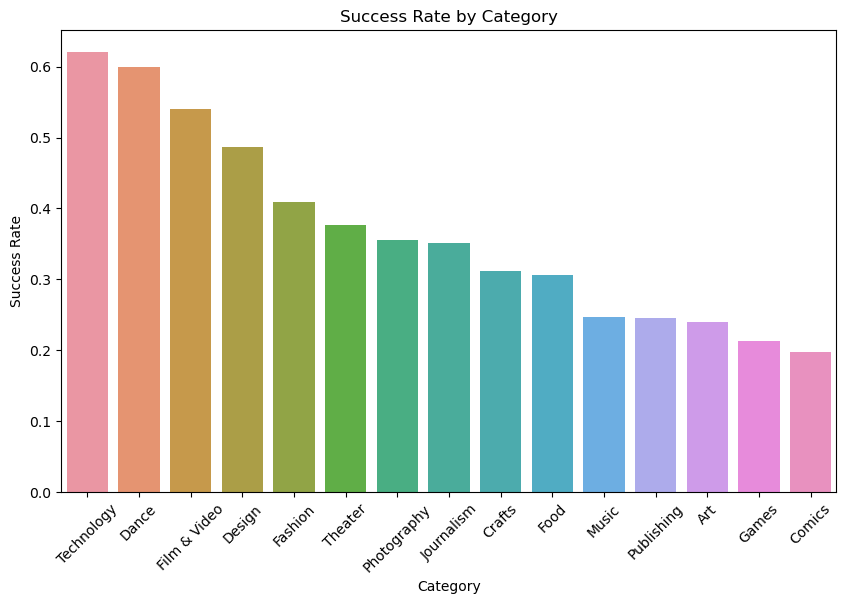